# Boston housing data

## Regression

In [1]:
# Here we will use the example dataset that comes with scikit learn
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
print(boston.target.shape)

(506, 13)
(506,)


In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# Generate a dictionnary to associate the name a feature to its column number in the design matrix
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
Feature = dict([(f, i) for f, i in zip(feature_names, range(len(feature_names)))])
Feature

{'CRIM': 0,
 'ZN': 1,
 'INDUS': 2,
 'CHAS': 3,
 'NOX': 4,
 'RM': 5,
 'AGE': 6,
 'DIS': 7,
 'RAD': 8,
 'TAX': 9,
 'PTRATIO': 10,
 'B': 11,
 'LSTAT': 12,
 'MEDV': 13}

Text(0, 0.5, "Median value of owner-occupied homes in $1000's")

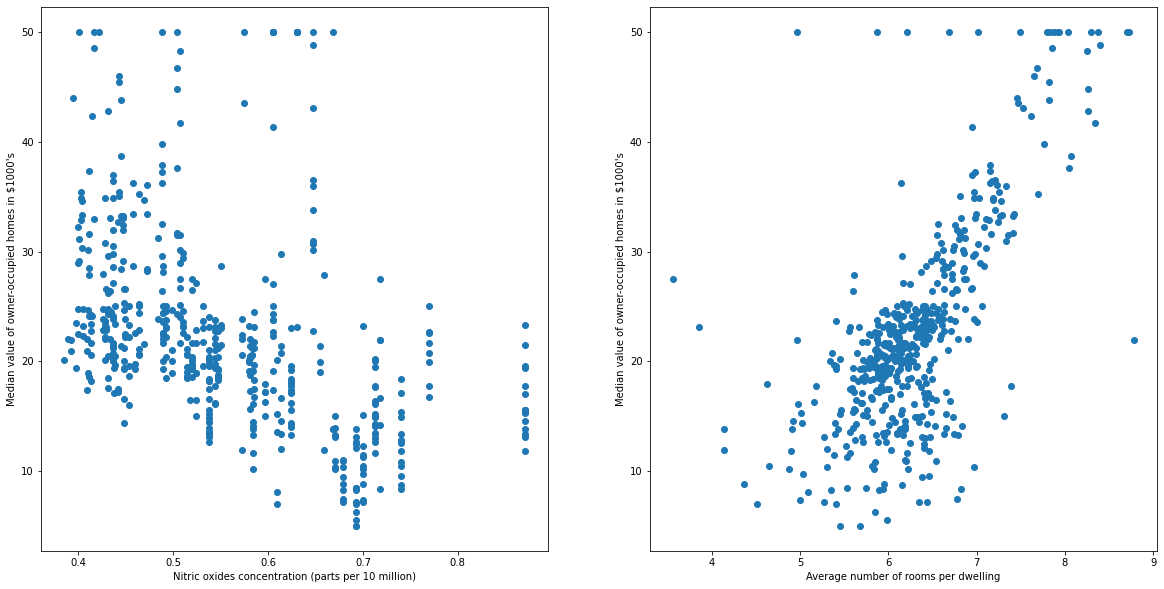

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.figure(figsize=(20,10))

nox_concentrations = boston.data[:, Feature['NOX']]
house_prices = boston.target

ax = plt.subplot(121)
ax.scatter(nox_concentrations, house_prices)
ax.set_xlabel("Nitric oxides concentration (parts per 10 million)")
ax.set_ylabel("Median value of owner-occupied homes in $1000's")

rooms_per_dwelling = boston.data[:, Feature['RM']]
house_prices = boston.target

ax = plt.subplot(122)
ax.scatter(rooms_per_dwelling, house_prices)
ax.set_xlabel("Average number of rooms per dwelling")
ax.set_ylabel("Median value of owner-occupied homes in $1000's")

In [6]:
import numpy as np

#X = np.array([nox_concentrations]).T
X = np.array([rooms_per_dwelling]).T
y = house_prices
print("Dataset shape (X, y): ", X.shape, y.shape)
perm = np.random.permutation(506)
ind_train = perm[:253]
ind_test = perm[253:]

x_train = X[ind_train]
y_train = y[ind_train]

x_test = X[ind_test]
y_test = y[ind_test]

print("Training set shape (X, y):", x_train.shape, y_train.shape)

Dataset shape (X, y):  (506, 1) (506,)
Training set shape (X, y): (253, 1) (253,)


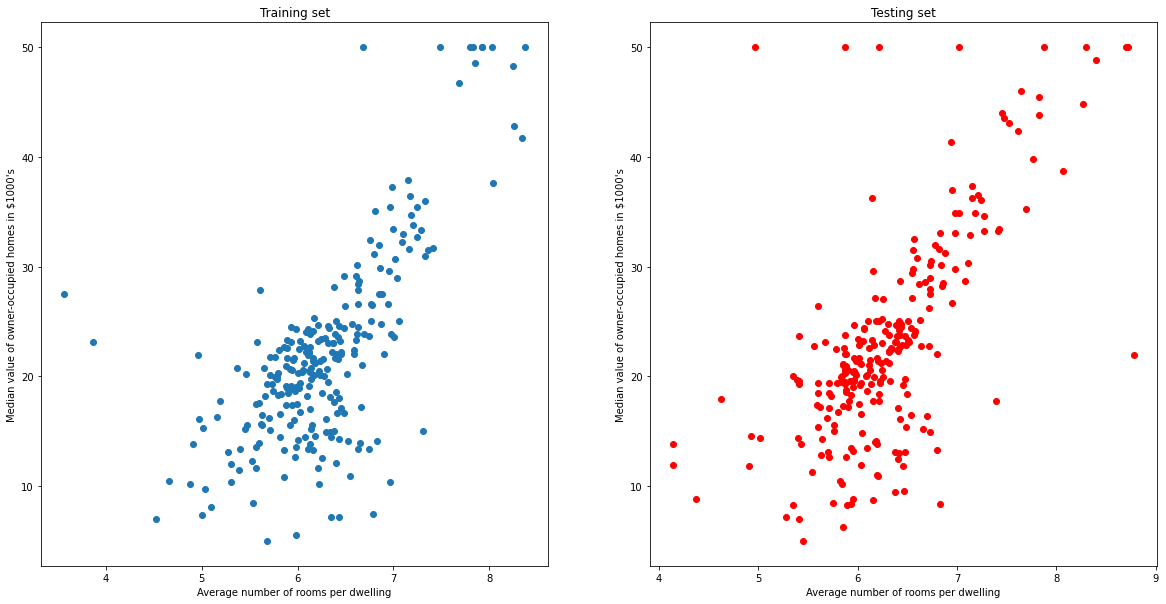

In [7]:
from numpy.linalg import pinv 

def cost(theta, X, y):
    y_pred = X.dot(theta)
    err_sq = (y_pred - y) ** 2
    return np.mean(err_sq)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].scatter(x_train, y_train)
ax[0].set_title('Training set')
ax[0].set_xlabel("Average number of rooms per dwelling")
ax[0].set_ylabel("Median value of owner-occupied homes in $1000's")

ax[1].scatter(x_test, y_test, color='red')
ax[1].set_title('Testing set')
ax[1].set_xlabel("Average number of rooms per dwelling")
ax[1].set_ylabel("Median value of owner-occupied homes in $1000's")

plt.show()

In [21]:
n_basis_fns = 4
basis_polynomial = 0 # 1 (polynomial regression) 0 (radial basis functions)

if basis_polynomial:
    ## Polynomial basis functions
    basis_functions = [
        lambda x: x ** 0,
        lambda x: x ** 1,
        lambda x: x ** 2,
        lambda x: x ** 3,
        lambda x: x ** 4,
        lambda x: x ** 5
    ]
else:
    # Radial Basis Functions
    sigma = 1.
    basis_functions = [
        lambda x: np.exp(-((x - 1) ** 2) / (2 * sigma ** 2)),
        lambda x: np.exp(-((x - 3) ** 2) / (2 * sigma ** 2)),
        lambda x: np.exp(-((x - 5) ** 2) / (2 * sigma ** 2)),
        lambda x: np.exp(-((x - 7) ** 2) / (2 * sigma ** 2)),
        lambda x: np.exp(-((x - 9) ** 2) / (2 * sigma ** 2)),
    ]

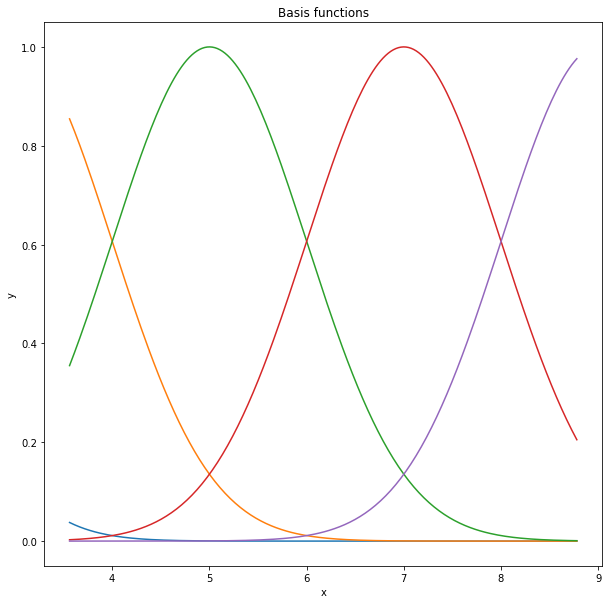

theta_star:  [648.99074095   1.52656485  10.66694259  18.87729189  56.51664179]
Cost for theta_star: 47.77327243842789


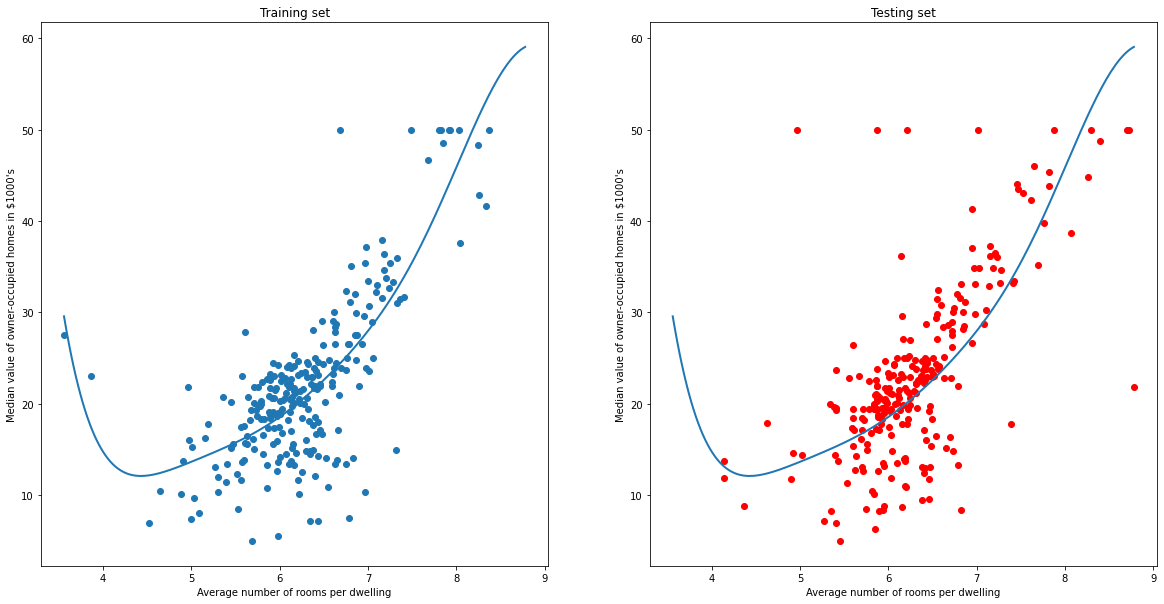

In [22]:
xx = np.linspace(np.min(X), np.max(X), 200)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
x_train_stack = []
x_test_stack = []
xx_stack = []
for i in range(n_basis_fns + 1):
    x_train_stack.append(basis_functions[i](x_train))
    x_test_stack.append(basis_functions[i](x_test))
    xx_stack.append(basis_functions[i](xx))
    plt.plot(xx, basis_functions[i](xx))
    
X_train = np.hstack(x_train_stack)
X_test = np.hstack(x_test_stack)
ax.set_title('Basis functions')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

# Find theta_star
# print(X_train.shape, X_test.shape)
theta_star = pinv(X_train).dot(y_train)
print("theta_star: ", theta_star.ravel())
print("Cost for theta_star:", cost(theta_star, X_test, y_test))

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

XX = np.array(xx_stack).T
yy = XX.dot(theta_star)

ax[0].scatter(x_train, y_train)
ax[0].plot(xx, yy, lw=2)
ax[0].set_title('Training set')
ax[0].set_xlabel("Average number of rooms per dwelling")
ax[0].set_ylabel("Median value of owner-occupied homes in $1000's")

ax[1].scatter(x_test, y_test, color='red')
ax[1].plot(xx, yy, lw=2)
ax[1].set_title('Testing set')
ax[1].set_xlabel("Average number of rooms per dwelling")
ax[1].set_ylabel("Median value of owner-occupied homes in $1000's")

plt.show()